# Project Name: Wine Quality Prediction

### Project done By:
- Nilotpal Bhattacharjee/ 4th/ HITK
- Kousturi Ghoshal/ 4th/ HITK
- Debangana Ram/ 4th/ HITK
- Avik Ghosh/ 4th/ HITK
- Shreetama Sam/ 4th/ HITK

## Problem Statement:
- We have to build a predictive model which shall predict the quality of wine.

### Dataset description:

- There are total 3918 samples in the dataset
- 11 features: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulphur dioxide, total sulphur dioxide, density, pH, sulphates and alcohol
- 12 th column contains the target class for each sample.


#### TOP

# Imorting libraries and classes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


# Importing the Data Set

In [2]:
wine_data = pd.read_csv("winequality-data.csv")


-[TOP](#TOP)

# Summarising the Data

In [3]:
wine_data.head(10)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,id
0,6.7,0.15,0.38,1.7,0.037,20.0,84.0,0.99046,3.09,0.53,11.4,6,981
1,6.7,0.44,0.31,1.9,0.030,41.0,104.0,0.99000,3.29,0.62,12.6,7,982
2,6.1,0.17,0.21,1.9,0.090,44.0,130.0,0.99255,3.07,0.41,9.7,5,983
3,6.6,0.39,0.22,4.0,0.038,17.0,98.0,0.99018,3.25,0.53,13.0,7,984
4,6.8,0.32,0.34,6.0,0.050,5.0,129.0,0.99530,3.19,0.40,9.1,5,985
5,8.3,0.28,0.27,17.5,0.045,48.0,253.0,1.00014,3.02,0.56,9.1,6,986
6,6.8,0.14,0.35,1.5,0.047,40.0,117.0,0.99111,3.07,0.72,11.1,6,987
7,6.3,0.21,0.31,1.2,0.043,30.0,117.0,0.99158,3.49,0.68,11.0,6,988
8,6.7,0.31,0.08,1.3,0.038,58.0,147.0,0.99220,3.18,0.46,10.0,5,989
9,5.9,0.27,0.29,11.4,0.036,31.0,115.0,0.99490,3.35,0.48,10.5,8,990


In [4]:
wine_data.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,id
count,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000
mean,6.854620,0.278027,0.333201,6.405819,0.045566,35.326187,138.395227,0.994026,3.187989,0.489704,10.518765,5.877489,2939.500000
std,0.841879,0.100459,0.121375,5.107972,0.021138,17.158043,42.996820,0.003025,0.150022,0.114186,1.237195,0.890364,1131.173506
min,3.800000,0.080000,0.000000,0.600000,0.009000,3.000000,9.000000,0.987110,2.740000,0.220000,8.000000,3.000000,981.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,107.250000,0.991700,3.090000,0.410000,9.500000,5.000000,1960.250000
50%,6.800000,0.260000,0.310000,5.200000,0.043000,34.000000,134.000000,0.993730,3.180000,0.470000,10.400000,6.000000,2939.500000
75%,7.300000,0.320000,0.380000,9.900000,0.050000,46.000000,168.000000,0.996160,3.280000,0.550000,11.400000,6.000000,3918.750000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.800000,1.080000,14.200000,9.000000,4898.000000


In [5]:
fixedAcidity = wine_data['fixed.acidity'].values
volatileAcidity = wine_data['volatile.acidity'].values
citricAcid = wine_data['citric.acid'].values
residualSugar = wine_data['residual.sugar'].values
chlorides = wine_data['chlorides'].values
freeSulfurDioxide = wine_data['free.sulfur.dioxide'].values
totalSulfurDioxide = wine_data['total.sulfur.dioxide'].values
density = wine_data['density'].values
pH = wine_data['pH'].values
sulphates = wine_data['sulphates'].values
alcohol = wine_data['alcohol'].values
quality = wine_data['quality'].values

-[TOP](#TOP)

# Visulalising the distributionof each attribute -BOXPLOT

Text(0.5, 1.0, 'Alcohol')

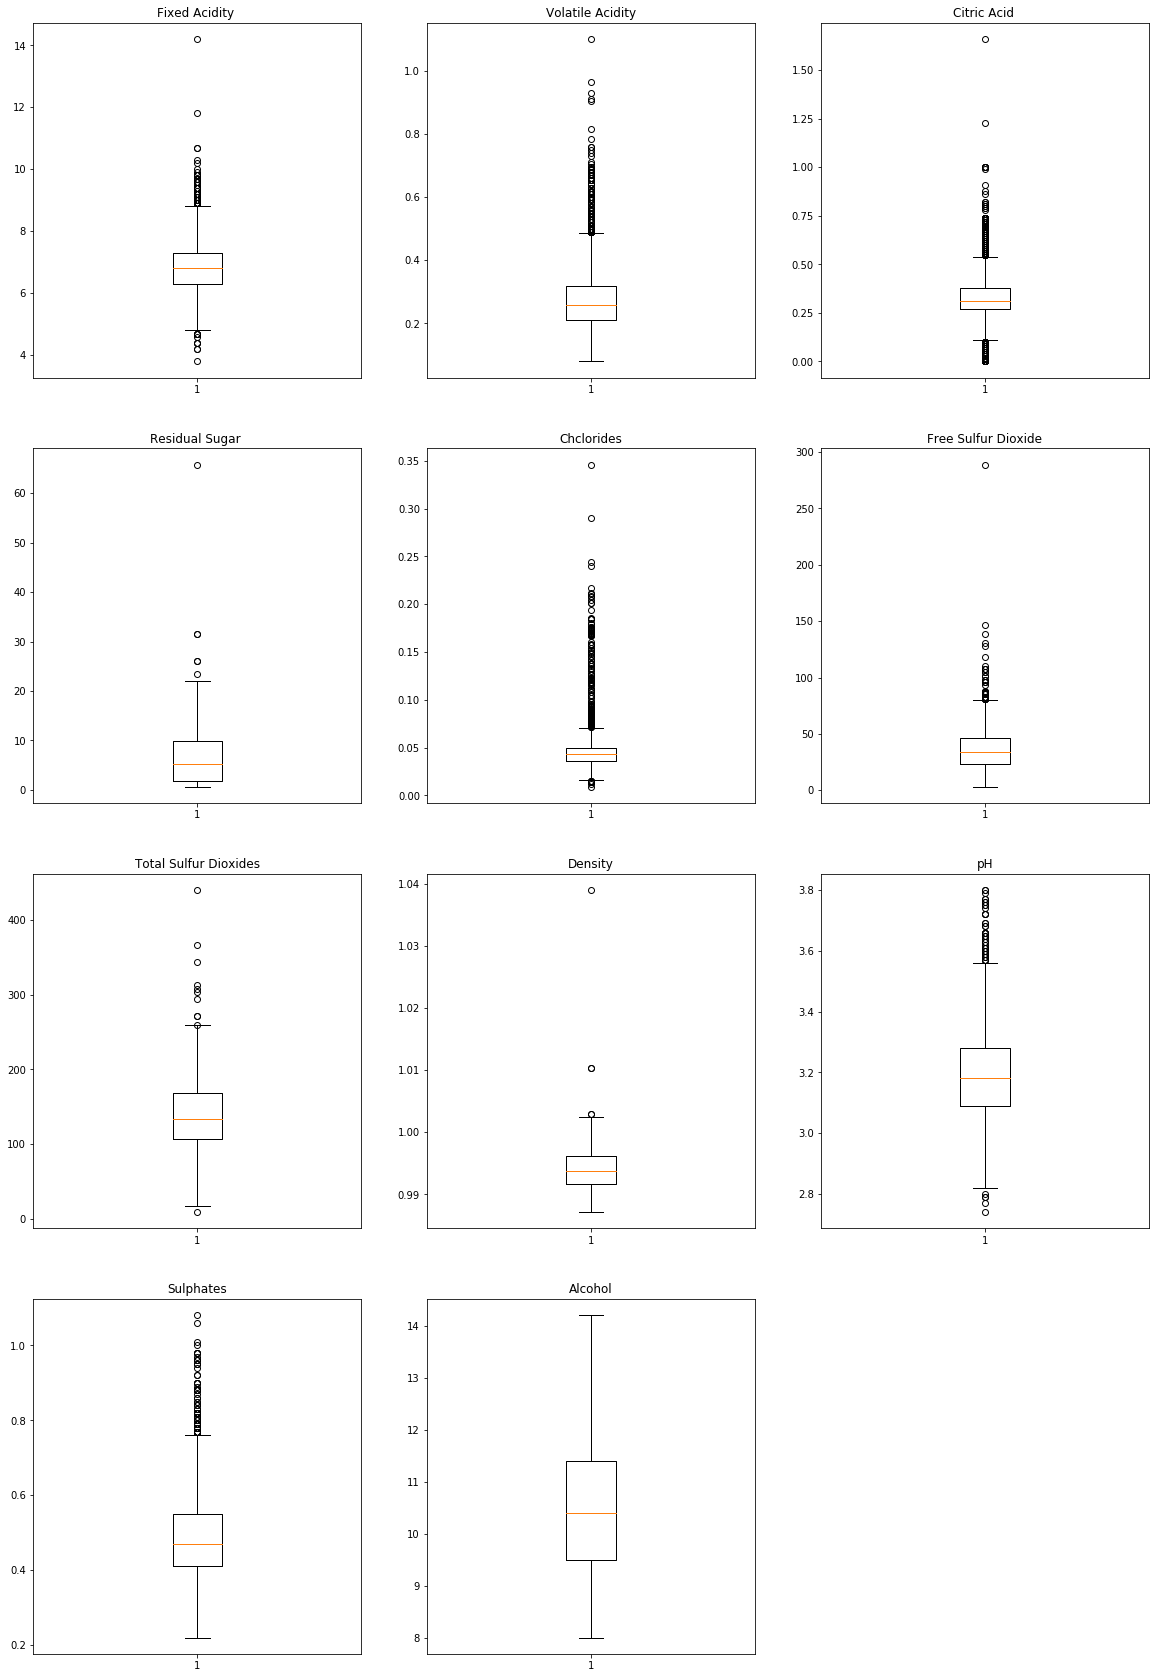

In [6]:
plt.figure(figsize = (20,30))
plt.grid()
plt.subplot(431)
plt.boxplot(fixedAcidity)
plt.title('Fixed Acidity ')

plt.subplot(432)
plt.boxplot(volatileAcidity)
plt.title('Volatile Acidity')
          
plt.subplot(433)
plt.boxplot(citricAcid)
plt.title('Citric Acid ')
          
plt.subplot(434)
plt.boxplot(residualSugar)
plt.title('Residual Sugar ')
           
plt.subplot(435)
plt.boxplot(chlorides)
plt.title('Chclorides')
          
plt.subplot(436)
plt.boxplot(freeSulfurDioxide )
plt.title('Free Sulfur Dioxide')
          
plt.subplot(437)
plt.boxplot(totalSulfurDioxide)
plt.title('Total Sulfur Dioxides')
          
plt.subplot(438)
plt.boxplot(density)
plt.title('Density')
          
plt.subplot(439)
plt.boxplot(pH)
plt.title('pH')


plt.subplot(4,3,10)
plt.boxplot(sulphates)
plt.title('Sulphates')
          
          
plt.subplot(4,3,11)
plt.boxplot(alcohol)
plt.title('Alcohol')
          

-[TOP](#TOP)

# Visulalising the distributionof each attribute - DENSITY PLOT

Text(0.5, 1.0, 'alcohol')

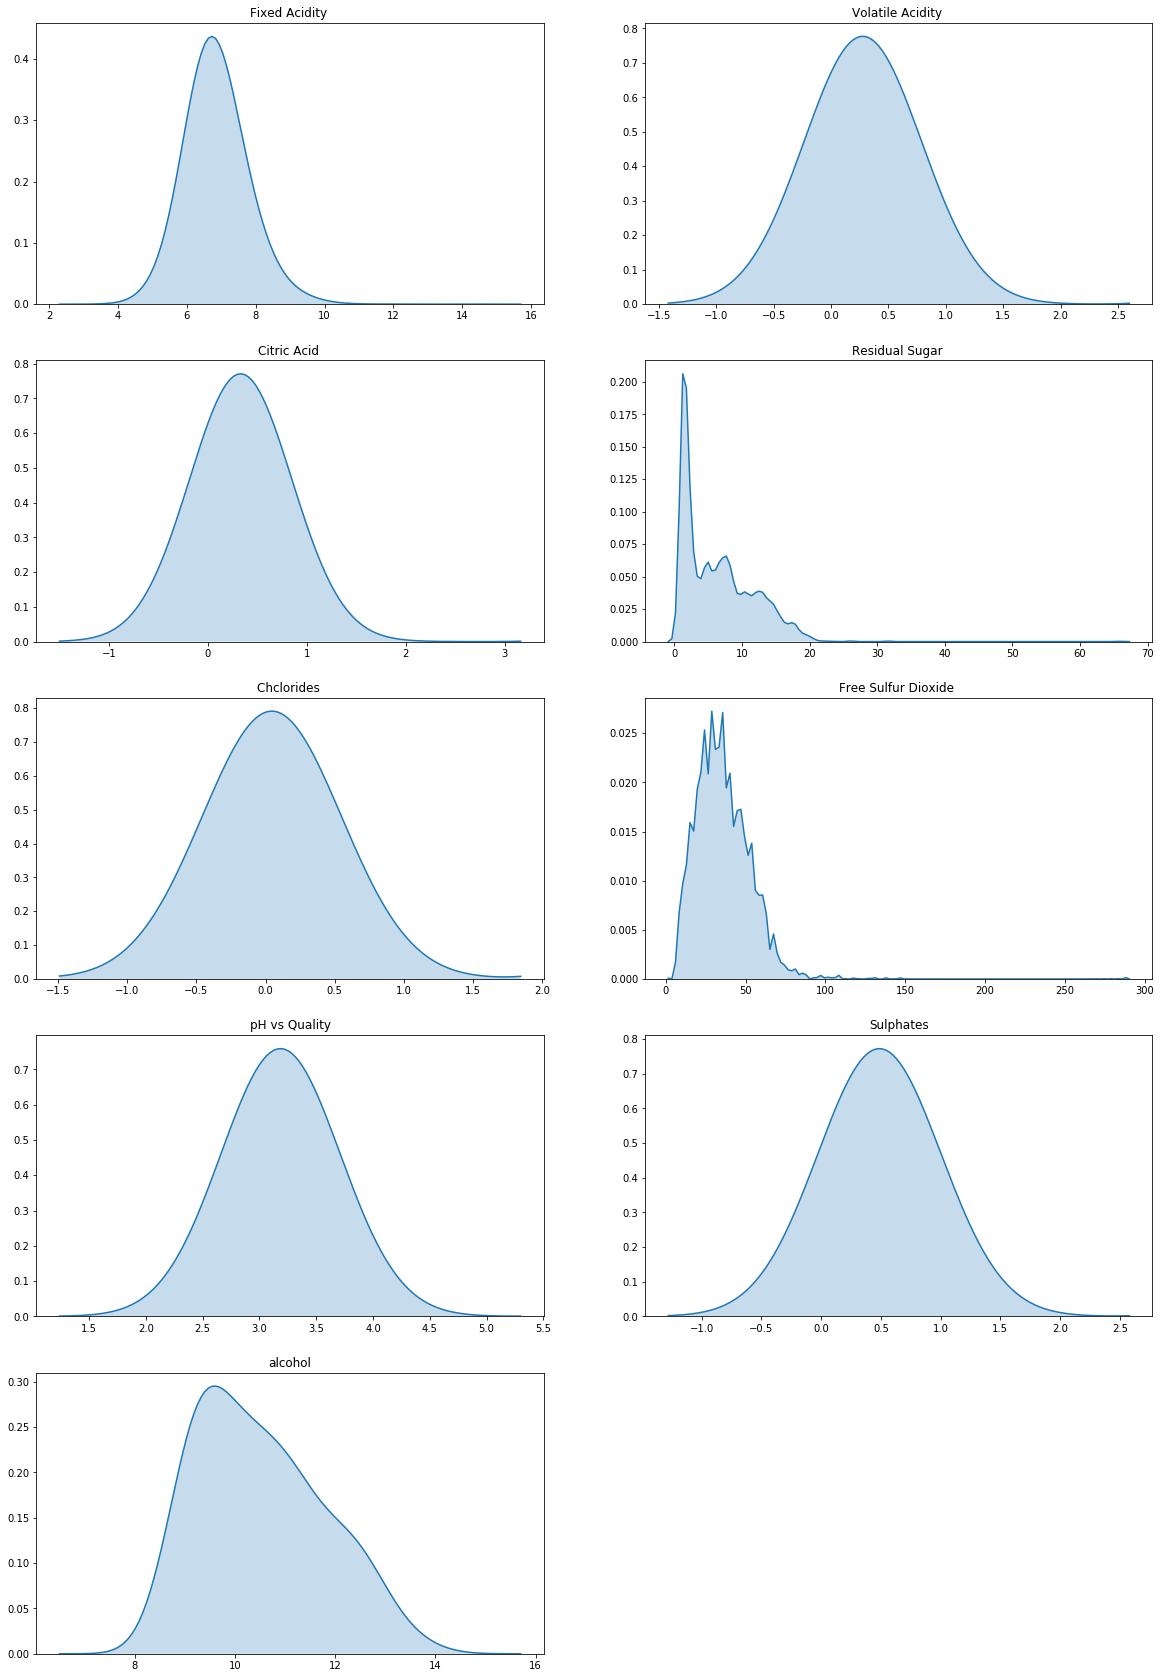

In [7]:
plt.figure(figsize = (20,30))
plt.subplot(521)
sb.kdeplot(np.array(fixedAcidity), bw=0.5,shade = True)
plt.title('Fixed Acidity ')

plt.subplot(522)
sb.kdeplot(np.array(volatileAcidity), bw=0.5,shade = True)
plt.title('Volatile Acidity ')
          
plt.subplot(523)
sb.kdeplot(np.array(citricAcid), bw=0.5,shade = True)
plt.title('Citric Acid ')
          
plt.subplot(524)
sb.kdeplot(np.array(residualSugar), bw=0.5,shade = True)
plt.title('Residual Sugar ')
           
plt.subplot(525)
sb.kdeplot(np.array(chlorides), bw=0.5,shade = True)
plt.title('Chclorides ')
          
plt.subplot(526)
sb.kdeplot(np.array(freeSulfurDioxide), bw=0.5,shade = True)
plt.title('Free Sulfur Dioxide ')
          
                    
plt.subplot(527)
sb.kdeplot(np.array(pH), bw=0.5,shade = True)
plt.title('pH vs Quality')


plt.subplot(528)
sb.kdeplot(np.array(sulphates), bw=0.5,shade = True)
plt.title('Sulphates')

plt.subplot(529)
sb.kdeplot(np.array(alcohol), bw=0.5,shade = True)
plt.title('alcohol')
          
          

-[TOP](#TOP)

#  Viewing the percentage samples belonging to each target class

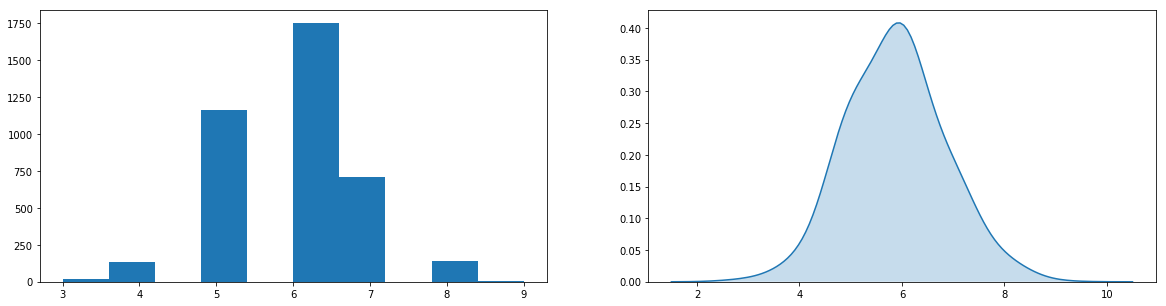

In [8]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.hist(wine_data['quality'])
plt.subplot(1,2,2)
sb.kdeplot(np.array(quality), bw=0.5,shade = True)

In [9]:
count = np.zeros(11)
j =0
for i in quality:
        count[i] = count[i] + 1
for i  in count[1:]:
    print("Number of samples of class {} = {}, percentge = {:.2f}%".format(j+1,i, (i/quality.shape[0])*100))
    #print("percentge of samples of class {} = {:.3f}%".format(j+1,(i/quality.shape[0])*100))
    j = j+1    

Number of samples of class 1 = 0.0, percentge = 0.00%
Number of samples of class 2 = 0.0, percentge = 0.00%
Number of samples of class 3 = 17.0, percentge = 0.43%
Number of samples of class 4 = 134.0, percentge = 3.42%
Number of samples of class 5 = 1163.0, percentge = 29.68%
Number of samples of class 6 = 1752.0, percentge = 44.72%
Number of samples of class 7 = 707.0, percentge = 18.04%
Number of samples of class 8 = 140.0, percentge = 3.57%
Number of samples of class 9 = 5.0, percentge = 0.13%
Number of samples of class 10 = 0.0, percentge = 0.00%


## We have samples belonging to class 3, 4, 5, 6,7 ,8 and 9. Hence our confusion matrix willl also contain only these classes.

-[TOP](#TOP)

# It is clear that this is a case of imbalanced clasification.
 - The model will fail to predict the classes for which we have less no of samples.
 - Now we shall see which model gives highest accuracy among logistic regression, K-NN, SVM and decision tree classifier.
 - Then we shall see the classes that can be handeled by the model and which not. 

# Extracting the feature matrix and class level matrix

In [10]:
wine_data.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,id
0,6.7,0.15,0.38,1.7,0.037,20.0,84.0,0.99046,3.09,0.53,11.4,6,981
1,6.7,0.44,0.31,1.9,0.030,41.0,104.0,0.99000,3.29,0.62,12.6,7,982
2,6.1,0.17,0.21,1.9,0.090,44.0,130.0,0.99255,3.07,0.41,9.7,5,983
3,6.6,0.39,0.22,4.0,0.038,17.0,98.0,0.99018,3.25,0.53,13.0,7,984
4,6.8,0.32,0.34,6.0,0.050,5.0,129.0,0.99530,3.19,0.40,9.1,5,985


In [11]:
X = wine_data.iloc[:,0:11]
Y = wine_data.iloc[:,11]
print("The feature matrix is of order {} and the class level matrix is order {}.".format (X.shape, Y.shape))


The feature matrix is of order (3918, 11) and the class level matrix is order (3918,).


# Standardising the data

In [12]:
sc = StandardScaler()
X_std = sc.fit_transform(X)
X_std.shape
print("Standardised feature matrix ")
print(X_std)

Standardised feature matrix 
[[-0.18368377 -1.2745797   0.38562722 ... -0.65324531  0.3529426
   0.71237583]
 [-0.18368377  1.6125297  -0.19117318 ...  0.68006117  1.14122876
   1.68243568]
 [-0.89646655 -1.07546871 -1.01517374 ... -0.78657595 -0.69810562
  -0.66187561]
 ...
 [ 2.07346171 -0.97591321 -0.43837335 ... -1.31989854 -0.96086767
   0.46986087]
 [-0.54007516 -0.57769122  0.38562722 ... -1.45322919 -1.66156648
   0.38902255]
 [ 0.41030188  1.81164069  2.61042874 ... -0.18658804 -0.61051827
  -1.47025881]]


In [13]:
accuracy_list = [[],[],[],[],[],[],[],[],[],[]]

# Selecting no of components for principal component analysis

In [14]:
pca1=pca2=11

-[TOP](#TOP)

# Principal Component Analysis

In [15]:
pca = PCA(n_components = pca1)
pca

PCA(copy=True, iterated_power='auto', n_components=11, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

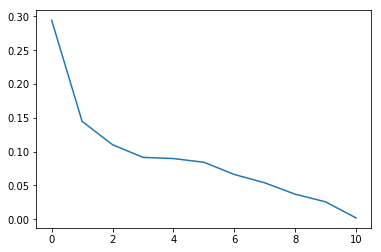

In [16]:
X_transform = pca.fit_transform(X_std)
ev = pca.explained_variance_ratio_
plt.plot(ev)

In [17]:
X_transform

array([[-2.0593972 , -0.96917069,  1.0766944 , ..., -0.27289485,
        -0.11309147, -0.03791937],
       [-2.24848353,  0.71343131,  0.07307042, ...,  0.34063085,
         0.80119889, -0.05940463],
       [-0.05215008,  0.35919251, -0.37321004, ..., -0.02297518,
         0.02862369,  0.11818611],
       ...,
       [-1.69235289, -2.61144628,  0.25202135, ...,  0.27455651,
         0.40976358, -0.1023849 ],
       [-0.12497588, -1.10974864, -0.46827055, ..., -0.08871804,
        -0.43379327,  0.06482754],
       [ 3.29865144, -0.24111374,  0.29206248, ..., -0.93830925,
         1.35236662, -0.05272711]])

-[TOP](#TOP)

# Creating training and test split

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X_transform,Y,test_size = 0.15, shuffle = True)

- We keep the trainig and testing split same for all models. 

 # Applying Logistic regression
 - basically a binary classification method ,but cmbined with one-vs-all method it can be used as a multiclass classifier.

C:\Users\Neil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Neil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy of Logistic Regression on test data = 55.27%


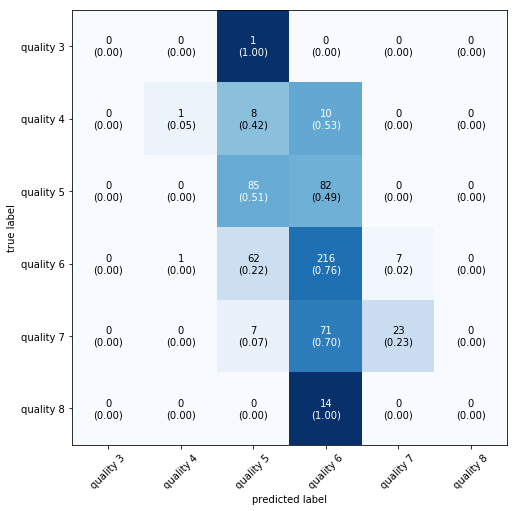


Precision of quality 3 is 0.00% 
Precision of quality 4 is 50.00% 
Precision of quality 5 is 52.15% 
Precision of quality 6 is 54.96% 
Precision of quality 7 is 76.67% 
Precision of quality 8 is 0.00% 

recall of quality 3 is 0.00% 
recall of quality 4 is 5.26% 
recall of quality 5 is 50.90% 
recall of quality 6 is 75.52% 
recall of quality 7 is 22.77% 
recall of quality 8 is 0.00% 

  F1 of quality 3: nan
  F1 of quality 4: 0.10
  F1 of quality 5: 0.52
  F1 of quality 6: 0.64
  F1 of quality 7: 0.35
  F1 of quality 8: nan


C:\Users\Neil\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


In [19]:
model_lr = LogisticRegression()
model_lr.fit(X_train,Y_train)
Y_pred = model_lr.predict(X_test)
Y_pred.shape
cm = confusion_matrix(Y_test,Y_pred)
accuracy_lr= np.trace(cm)/np.sum(cm)
accuracy_list[0].append(accuracy_lr)
print("Accuracy of Logistic Regression on test data = {:.2f}%".format(accuracy_lr *100))

labels = ['quality 3','quality 4','quality 5','quality 6','quality 7','quality 8']
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm,
                                figsize =(8,8),
                                colorbar=False,
                                show_absolute=True,
                                show_normed=True,
                                class_names=labels)
plt.show()

precision = []
recall = []
print("")
for i in range(6):# selecting column i
    if np.sum(cm[:,i])==0:
        precision.append(0)
    else:
        precision.append(cm[i,i]/np.sum(cm[:,i]))
j = 3        
for i  in precision:
    print("Precision of quality {} is {:.2f}% ". format(j, i*100))
    j=j+1
print("")
for i in range(6):# selecting column i
    if np.sum(cm[i,:])==0:
        recall.append(0)
    else:
        recall.append(cm[i,i]/np.sum(cm[i,:]))
j = 3        
for i  in recall:
    print("recall of quality {} is {:.2f}% ". format(j, i*100))
    j=j+1
print("")
for i in range(6):
    print("  F1 of quality {}: {:.2f}".format(i+3,2*(precision[i]*recall[i]/(precision[i]+recall[i]))))

# Although we have got 50% accuracy here, our model cannot handle clases other than 5, 6 and 7. Even among these classes, 6 ishandled best, then  5 and lastly 7

# K Nearest Neighbour Classification

Accuracy of KNN is 53.06%


C:\Users\Neil\Anaconda3\lib\site-packages\mlxtend\plotting\plot_confusion_matrix.py:66: RuntimeWarning: invalid value encountered in true_divide
  normed_conf_mat = conf_mat.astype('float') / total_samples


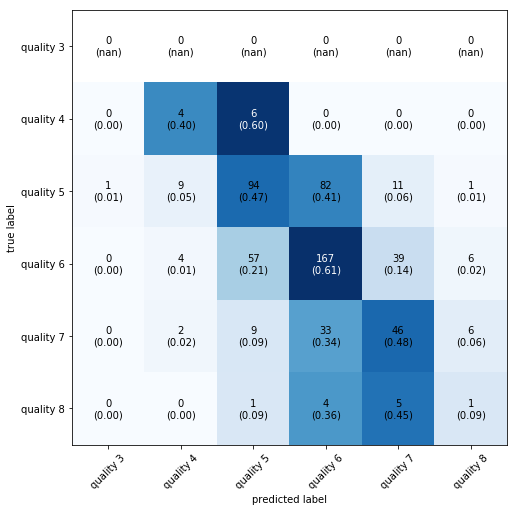


Precision of quality 3 is 0.00% 
Precision of quality 4 is 21.05% 
Precision of quality 5 is 56.29% 
Precision of quality 6 is 58.39% 
Precision of quality 7 is 45.54% 
Precision of quality 8 is 7.14% 

recall of quality 3 is 0.00% 
recall of quality 4 is 40.00% 
recall of quality 5 is 47.47% 
recall of quality 6 is 61.17% 
recall of quality 7 is 47.92% 
recall of quality 8 is 9.09% 

  F1 of quality 3: nan
  F1 of quality 4: 0.28
  F1 of quality 5: 0.52
  F1 of quality 6: 0.60
  F1 of quality 7: 0.47
  F1 of quality 8: 0.08


C:\Users\Neil\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in double_scalars


In [100]:
model_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski')
model_knn.fit(X_train,Y_train)
Y_pred = model_knn.predict(X_test)
cm = confusion_matrix(Y_pred,Y_test)
print("Accuracy of KNN is {:.2f}%".format(np.trace(cm)*100 /np.sum(cm)))

labels = ['quality 3','quality 4','quality 5','quality 6','quality 7','quality 8']
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm,
                                figsize =(8,8),
                                colorbar=False,
                                show_absolute=True,
                                show_normed=True,
                                class_names=labels)
plt.show()

precision = []
recall = []
print("")
for i in range(6):# selecting column i
    if np.sum(cm[:,i])==0:
        precision.append(0)
    else:
        precision.append(cm[i,i]/np.sum(cm[:,i]))
j = 3        
for i  in precision:
    print("Precision of quality {} is {:.2f}% ". format(j, i*100))
    j=j+1
print("")
for i in range(6):# selecting column i
    if np.sum(cm[i,:])==0:
        recall.append(0)
    else:
        recall.append(cm[i,i]/np.sum(cm[i,:]))
j = 3        
for i  in recall:
    print("recall of quality {} is {:.2f}% ". format(j, i*100))
    j=j+1
print("")
for i in range(6):
    print("  F1 of quality {}: {:.2f}".format(i+3,2*(precision[i]*recall[i]/(precision[i]+recall[i]))))

# Compared to Logistic regression KNN can handle quality 4 ,5 ,6 ,7 and 8. 

- [TOP](#TOP)

# Linear SVM

Accuracy of  linear SVM on test data = 52.04%


C:\Users\Neil\Anaconda3\lib\site-packages\mlxtend\plotting\plot_confusion_matrix.py:66: RuntimeWarning: invalid value encountered in true_divide
  normed_conf_mat = conf_mat.astype('float') / total_samples


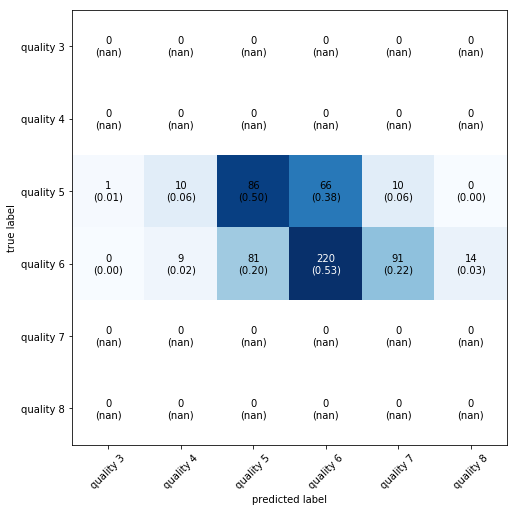


Precision of quality 3 is 0.00% 
Precision of quality 4 is 0.00% 
Precision of quality 5 is 51.50% 
Precision of quality 6 is 76.92% 
Precision of quality 7 is 0.00% 
Precision of quality 8 is 0.00% 

recall of quality 3 is 0.00% 
recall of quality 4 is 0.00% 
recall of quality 5 is 49.71% 
recall of quality 6 is 53.01% 
recall of quality 7 is 0.00% 
recall of quality 8 is 0.00% 

  F1 of quality 3: nan
  F1 of quality 4: nan
  F1 of quality 5: 0.51
  F1 of quality 6: 0.63
  F1 of quality 7: nan
  F1 of quality 8: nan


C:\Users\Neil\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in double_scalars


In [21]:
model_lsvm = SVC(kernel= 'linear')
model_lsvm.fit(X=X_train, y=Y_train)
y_pred_linear_test =  model_lsvm.predict(X_test)
cm = confusion_matrix(y_pred_linear_test,Y_test)
accuracy_svm_l= np.trace(cm)/np.sum(cm)
accuracy_list[2].append(accuracy_svm_l)
print("Accuracy of  linear SVM on test data = {:.2f}%".format(accuracy_svm_l*100))

labels = ['quality 3','quality 4','quality 5','quality 6','quality 7','quality 8']
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm,
                                figsize =(8,8),
                                colorbar=False,
                                show_absolute=True,
                                show_normed=True,
                                class_names=labels)
plt.show()

precision = []
recall = []
print("")
for i in range(6):# selecting column i
    if np.sum(cm[:,i])==0:
        precision.append(0)
    else:
        precision.append(cm[i,i]/np.sum(cm[:,i]))
j = 3        
for i  in precision:
    print("Precision of quality {} is {:.2f}% ". format(j, i*100))
    j=j+1
print("")
for i in range(6):# selecting column i
    if np.sum(cm[i,:])==0:
        recall.append(0)
    else:
        recall.append(cm[i,i]/np.sum(cm[i,:]))
j = 3        
for i  in recall:
    print("recall of quality {} is {:.2f}% ". format(j, i*100))
    j=j+1
print("")
for i in range(6):
    print("  F1 of quality {}: {:.2f}".format(i+3,2*(precision[i]*recall[i]/(precision[i]+recall[i]))))

# SVM can handle only two classes. 

- [TOP](#TOP)

# Polynomial SVM

C:\Users\Neil\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of  plynomial SVM on test data = 55.95%


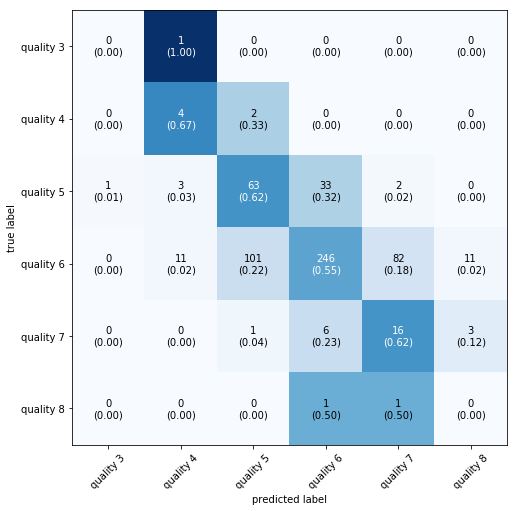


Precision of quality 3 is 0.00% 
Precision of quality 4 is 21.05% 
Precision of quality 5 is 37.72% 
Precision of quality 6 is 86.01% 
Precision of quality 7 is 15.84% 
Precision of quality 8 is 0.00% 

recall of quality 3 is 0.00% 
recall of quality 4 is 66.67% 
recall of quality 5 is 61.76% 
recall of quality 6 is 54.55% 
recall of quality 7 is 61.54% 
recall of quality 8 is 0.00% 

  F1 of quality 3: nan
  F1 of quality 4: 0.32
  F1 of quality 5: 0.47
  F1 of quality 6: 0.67
  F1 of quality 7: 0.25
  F1 of quality 8: nan


C:\Users\Neil\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


In [101]:
model_psvm = SVC(kernel= 'poly', degree = 3) 
model_psvm.fit(X=X_train, y=Y_train)
y_pred_poly_test = model_psvm.predict(X_test)
cm = confusion_matrix(y_pred_poly_test,Y_test)
accuracy_svm_p = np.trace(cm)/np.sum(cm)
accuracy_list[3].append(accuracy_svm_p)

print("Accuracy of  plynomial SVM on test data = {:.2f}%".format(accuracy_svm_p*100))

labels = ['quality 3','quality 4','quality 5','quality 6','quality 7','quality 8']
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm,
                                figsize =(8,8),
                                colorbar=False,
                                show_absolute=True,
                                show_normed=True,
                                class_names=labels)
plt.show()

precision = []
recall = []
print("")
for i in range(6):# selecting column i
    if np.sum(cm[:,i])==0:
        precision.append(0)
    else:
        precision.append(cm[i,i]/np.sum(cm[:,i]))
j = 3        
for i  in precision:
    print("Precision of quality {} is {:.2f}% ". format(j, i*100))
    j=j+1
print("")
for i in range(6):# selecting column i
    if np.sum(cm[i,:])==0:
        recall.append(0)
    else:
        recall.append(cm[i,i]/np.sum(cm[i,:]))
j = 3        
for i  in recall:
    print("recall of quality {} is {:.2f}% ". format(j, i*100))
    j=j+1
print("")
for i in range(6):
    print("  F1 of quality {}: {:.2f}".format(i+3,2*(precision[i]*recall[i]/(precision[i]+recall[i]))))

# Better than Linear SVM but KNN was better as it could handle one more class than polynomial SVM

- [TOP](#TOP)

# Decison Tree Classifier

Accuracy of  Decision Tree Classifier on test data = 56.46%


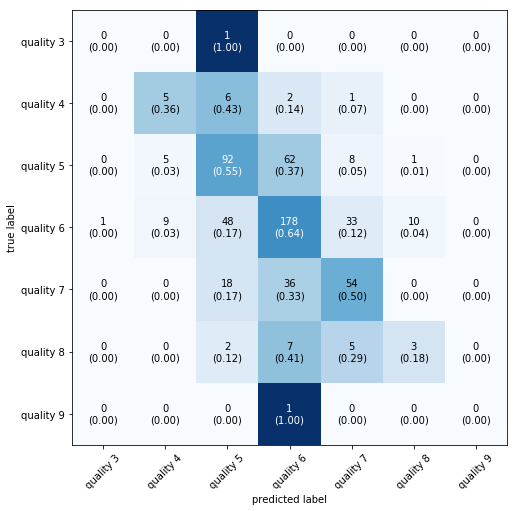


Precision of quality 3 is 0.00% 
Precision of quality 4 is 26.32% 
Precision of quality 5 is 55.09% 
Precision of quality 6 is 62.24% 
Precision of quality 7 is 53.47% 
Precision of quality 8 is 21.43% 
Precision of quality 9 is 0.00% 

recall of quality 3 is 0.00% 
recall of quality 4 is 35.71% 
recall of quality 5 is 54.76% 
recall of quality 6 is 63.80% 
recall of quality 7 is 50.00% 
recall of quality 8 is 17.65% 
recall of quality 9 is 0.00% 

  F1 of quality 3: nan
  F1 of quality 4: 0.30
  F1 of quality 5: 0.55
  F1 of quality 6: 0.63
  F1 of quality 7: 0.52
  F1 of quality 8: 0.19
  F1 of quality 9: nan


C:\Users\Neil\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


In [25]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,Y_train)
Y_pred = model_dt.predict(X_test)
cm = confusion_matrix(Y_pred,Y_test)
accuracy_dt = np.trace(cm)/np.sum(cm)
accuracy_list[4].append(accuracy_dt)

print("Accuracy of  Decision Tree Classifier on test data = {:.2f}%".format(accuracy_dt *100))

labels = ['quality 3','quality 4','quality 5','quality 6','quality 7','quality 8','quality 9']
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm,
                                figsize =(8,8),
                                colorbar=False,
                                show_absolute=True,
                                show_normed=True,
                                class_names=labels)
plt.show()

precision = []
recall = []
print("")
for i in range(7):# selecting column i
    if np.sum(cm[:,i])==0:
        precision.append(0)
    else:
        precision.append(cm[i,i]/np.sum(cm[:,i]))
j = 3        
for i  in precision:
    print("Precision of quality {} is {:.2f}% ". format(j, i*100))
    j=j+1
print("")
for i in range(7):# selecting column i
    if np.sum(cm[i,:])==0:
        recall.append(0)
    else:
        recall.append(cm[i,i]/np.sum(cm[i,:]))
j = 3        
for i  in recall:
    print("recall of quality {} is {:.2f}% ". format(j, i*100))
    j=j+1
print("")
for i in range(7):
    print("  F1 of quality {}: {:.2f}".format(i+3,2*(precision[i]*recall[i]/(precision[i]+recall[i]))))

# Both deision Tree and KNN are handling maximum no of classes. Decision tree has greater accuracy than KNN.


- [TOP](#TOP)

# Methods to tackle Imbalanced Data:


- Undersampling
- oversampling 



# These methods are often presented as great ways to balance the dataset before fitting a classifier on it. In a few words, these methods act on the dataset as follows:
- Under-sampling: Keeping samples from the majority class.
- over-sampling: consists in replicating some points from the minority class in order to increase its cardinality or generating synthetic data consists in creating new synthetic points from the minority class to increase its cardinality

# Under-sampling.

In [83]:
from imblearn.under_sampling import ClusterCentroids

In [87]:
cc = ClusterCentroids(random_state=0)
X_resampled_uds, Y_resampled_uds = cc.fit_resample(X, Y)

# Viewing the number of samples belonging to each class 

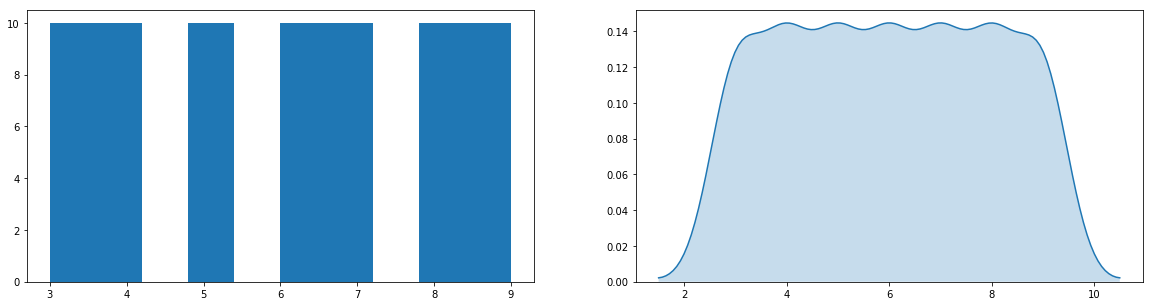

In [91]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.hist(Y_resampled_uds)
plt.subplot(1,2,2)
sb.kdeplot(np.array(Y_resampled_uds), bw=0.5,shade = True)

# KNN

Accuracy of KNN is 0.17%


C:\Users\Neil\Anaconda3\lib\site-packages\mlxtend\plotting\plot_confusion_matrix.py:66: RuntimeWarning: invalid value encountered in true_divide
  normed_conf_mat = conf_mat.astype('float') / total_samples


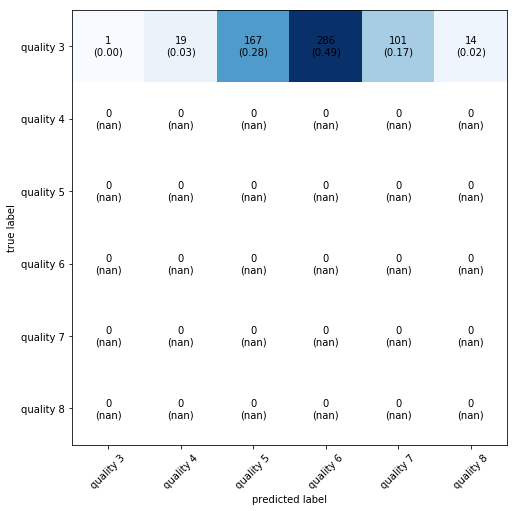


Precision of quality 3 is 100.00% 
Precision of quality 4 is 0.00% 
Precision of quality 5 is 0.00% 
Precision of quality 6 is 0.00% 
Precision of quality 7 is 0.00% 
Precision of quality 8 is 0.00% 

recall of quality 3 is 0.17% 
recall of quality 4 is 0.00% 
recall of quality 5 is 0.00% 
recall of quality 6 is 0.00% 
recall of quality 7 is 0.00% 
recall of quality 8 is 0.00% 

  F1 of quality 3: 0.00
  F1 of quality 4: nan
  F1 of quality 5: nan
  F1 of quality 6: nan
  F1 of quality 7: nan
  F1 of quality 8: nan


C:\Users\Neil\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in double_scalars


In [97]:
model_knn = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski')
model_knn.fit(X_resampled_uds,Y_resampled_uds)
Y_pred = model_knn.predict(X_test)
cm = confusion_matrix(Y_pred,Y_test)
print("Accuracy of KNN is {:.2f}%".format((np.trace(cm) /np.sum(cm))*100))

labels = ['quality 3','quality 4','quality 5','quality 6','quality 7','quality 8']
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm,
                                figsize =(8,8),
                                colorbar=False,
                                show_absolute=True,
                                show_normed=True,
                                class_names=labels)
plt.show()

precision = []
recall = []
print("")
for i in range(6):# selecting column i
    if np.sum(cm[:,i])==0:
        precision.append(0)
    else:
        precision.append(cm[i,i]/np.sum(cm[:,i]))
j = 3        
for i  in precision:
    print("Precision of quality {} is {:.2f}% ". format(j, i*100))
    j=j+1
print("")
for i in range(6):# selecting column i
    if np.sum(cm[i,:])==0:
        recall.append(0)
    else:
        recall.append(cm[i,i]/np.sum(cm[i,:]))
j = 3        
for i  in recall:
    print("recall of quality {} is {:.2f}% ". format(j, i*100))
    j=j+1
print("")
for i in range(6):
    print("  F1 of quality {}: {:.2f}".format(i+3,2*(precision[i]*recall[i]/(precision[i]+recall[i]))))

# Logistic regression

C:\Users\Neil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Neil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Neil\Anaconda3\lib\site-packages\mlxtend\plotting\plot_confusion_matrix.py:66: RuntimeWarning: invalid value encountered in true_divide
  normed_conf_mat = conf_mat.astype('float') / total_samples


Accuracy of Logistic Regression on test data = 6.97%


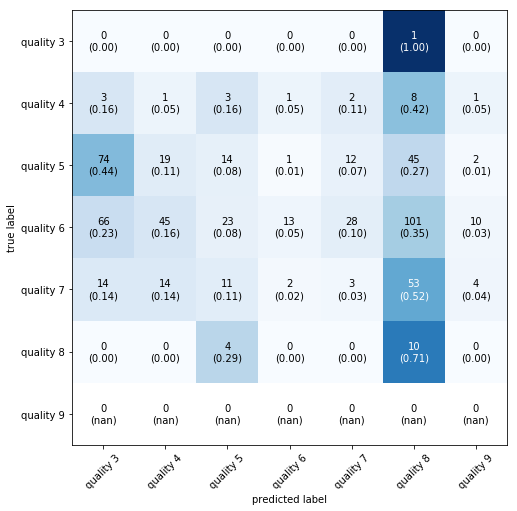


Precision of quality 3 is 0.00% 
Precision of quality 4 is 1.27% 
Precision of quality 5 is 25.45% 
Precision of quality 6 is 76.47% 
Precision of quality 7 is 6.67% 
Precision of quality 8 is 4.59% 
Precision of quality 9 is 0.00% 

recall of quality 3 is 0.00% 
recall of quality 4 is 5.26% 
recall of quality 5 is 8.38% 
recall of quality 6 is 4.55% 
recall of quality 7 is 2.97% 
recall of quality 8 is 71.43% 
recall of quality 9 is 0.00% 

  F1 of quality 3: nan
  F1 of quality 4: 0.02
  F1 of quality 5: 0.13
  F1 of quality 6: 0.09
  F1 of quality 7: 0.04
  F1 of quality 8: 0.09
  F1 of quality 9: nan


C:\Users\Neil\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in double_scalars


In [98]:
model_lr = LogisticRegression()
model_lr.fit(X_resampled_uds,Y_resampled_uds)
Y_pred = model_lr.predict(X_test)
cm = confusion_matrix(Y_test,Y_pred)
accuracy_lr= np.trace(cm)/np.sum(cm)
print("Accuracy of Logistic Regression on test data = {:.2f}%".format(accuracy_lr *100))

labels = ['quality 3','quality 4','quality 5','quality 6','quality 7','quality 8','quality 9']
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm,
                                figsize =(8,8),
                                colorbar=False,
                                show_absolute=True,
                                show_normed=True,
                                class_names=labels)
plt.show()

precision = []
recall = []
print("")
for i in range(7):# selecting column i
    if np.sum(cm[:,i])==0:
        precision.append(0)
    else:
        precision.append(cm[i,i]/np.sum(cm[:,i]))
j = 3        
for i  in precision:
    print("Precision of quality {} is {:.2f}% ". format(j, i*100))
    j=j+1
print("")
for i in range(7):# selecting column i
    if np.sum(cm[i,:])==0:
        recall.append(0)
    else:
        recall.append(cm[i,i]/np.sum(cm[i,:]))
j = 3        
for i  in recall:
    print("recall of quality {} is {:.2f}% ". format(j, i*100))
    j=j+1
print("")
for i in range(7):
    print("  F1 of quality {}: {:.2f}".format(i+3,2*(precision[i]*recall[i]/(precision[i]+recall[i]))))

# Decision Tree

Accuracy of  Decision Tree Classifier on test data = 2.55%


C:\Users\Neil\Anaconda3\lib\site-packages\mlxtend\plotting\plot_confusion_matrix.py:66: RuntimeWarning: invalid value encountered in true_divide
  normed_conf_mat = conf_mat.astype('float') / total_samples


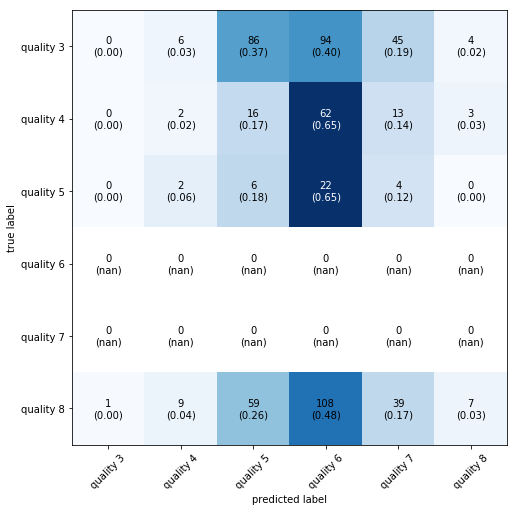


Precision of quality 3 is 0.00% 
Precision of quality 4 is 10.53% 
Precision of quality 5 is 3.59% 
Precision of quality 6 is 0.00% 
Precision of quality 7 is 0.00% 
Precision of quality 8 is 50.00% 

recall of quality 3 is 0.00% 
recall of quality 4 is 2.08% 
recall of quality 5 is 17.65% 
recall of quality 6 is 0.00% 
recall of quality 7 is 0.00% 
recall of quality 8 is 3.14% 

  F1 of quality 3: nan
  F1 of quality 4: 0.03
  F1 of quality 5: 0.06
  F1 of quality 6: nan
  F1 of quality 7: nan
  F1 of quality 8: 0.06


C:\Users\Neil\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in double_scalars


In [99]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_resampled_uds,Y_resampled_uds)
Y_pred = model_dt.predict(X_test)
cm = confusion_matrix(Y_pred,Y_test)
accuracy_dt = np.trace(cm)/np.sum(cm)
print("Accuracy of  Decision Tree Classifier on test data = {:.2f}%".format(accuracy_dt *100))

labels = ['quality 3','quality 4','quality 5','quality 6','quality 7','quality 8']
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm,
                                figsize =(8,8),
                                colorbar=False,
                                show_absolute=True,
                                show_normed=True,
                                class_names=labels)
plt.show()

precision = []
recall = []
print("")
for i in range(6):# selecting column i
    if np.sum(cm[:,i])==0:
        precision.append(0)
    else:
        precision.append(cm[i,i]/np.sum(cm[:,i]))
j = 3        
for i  in precision:
    print("Precision of quality {} is {:.2f}% ". format(j, i*100))
    j=j+1
print("")
for i in range(6):# selecting column i
    if np.sum(cm[i,:])==0:
        recall.append(0)
    else:
        recall.append(cm[i,i]/np.sum(cm[i,:]))
j = 3        
for i  in recall:
    print("recall of quality {} is {:.2f}% ". format(j, i*100))
    j=j+1
print("")
for i in range(6):
    print("  F1 of quality {}: {:.2f}".format(i+3,2*(precision[i]*recall[i]/(precision[i]+recall[i]))))

# Under Sampling proved to be of no use as we are left with just 10 samples of every quality which is very inadequete for prediction.

# Over-sampling

In [93]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled_ovs, Y_resampled_ovs = ros.fit_resample(X, Y)

In [94]:
X_resampled_ovs.shape

(12264, 11)

# Viewing the number of samples of each class

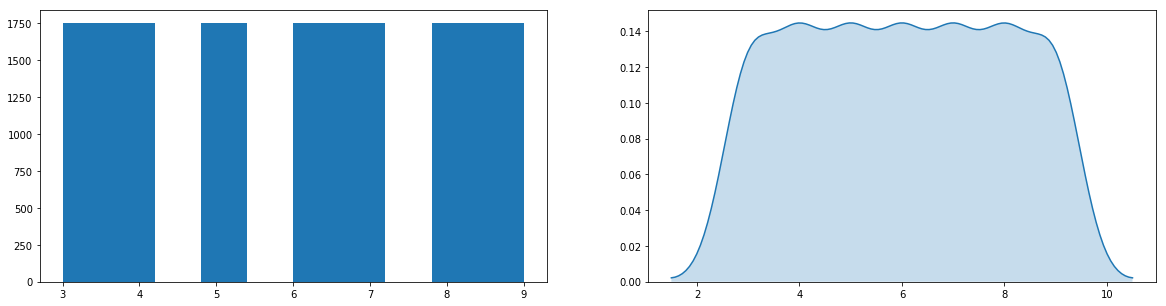

In [95]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.hist(Y_resampled_ovs)
plt.subplot(1,2,2)
sb.kdeplot(np.array(Y_resampled_ovs), bw=0.5,shade = True)

# Standardising the Over-Sampled data

In [50]:
X_std_resampled = sc.fit_transform(X_resampled_ovs)
print("Standardised feature resampled matrix ")
print(X_std_resampled)

Standardised feature resampled matrix 
[[ 0.048686   -0.37427677  1.32431283 ...  1.00810561 -0.54600318
   1.46442018]
 [ 1.88785158 -0.29307577  0.97698737 ... -0.06901181 -0.20626787
  -0.34267863]
 [ 0.32456084 -0.53667878  0.19550509 ...  0.43786698 -0.03640021
   1.17528437]
 ...
 [ 0.32456084 -0.53667878  0.19550509 ...  0.43786698 -0.03640021
   1.17528437]
 [ 1.88785158 -0.29307577  0.97698737 ... -0.06901181 -0.20626787
  -0.34267863]
 [ 0.32456084 -0.53667878  0.19550509 ...  0.43786698 -0.03640021
   1.17528437]]


# logistic regresion on Resampled data

C:\Users\Neil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Neil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy of Logistic Regression on test data = 17.86%


C:\Users\Neil\Anaconda3\lib\site-packages\mlxtend\plotting\plot_confusion_matrix.py:66: RuntimeWarning: invalid value encountered in true_divide
  normed_conf_mat = conf_mat.astype('float') / total_samples


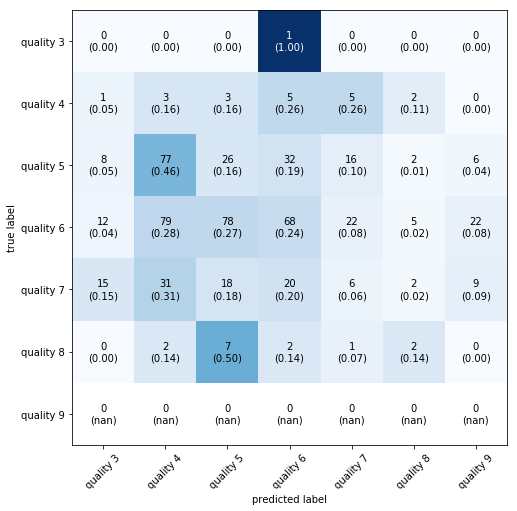


Precision of quality 3 is 0.00% 
Precision of quality 4 is 1.56% 
Precision of quality 5 is 19.70% 
Precision of quality 6 is 53.12% 
Precision of quality 7 is 12.00% 
Precision of quality 8 is 15.38% 
Precision of quality 9 is 0.00% 

recall of quality 3 is 0.00% 
recall of quality 4 is 15.79% 
recall of quality 5 is 15.57% 
recall of quality 6 is 23.78% 
recall of quality 7 is 5.94% 
recall of quality 8 is 14.29% 
recall of quality 9 is 0.00% 

  F1 of quality 3: nan
  F1 of quality 4: 0.03
  F1 of quality 5: 0.17
  F1 of quality 6: 0.33
  F1 of quality 7: 0.08
  F1 of quality 8: 0.15
  F1 of quality 9: nan


C:\Users\Neil\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in double_scalars


In [51]:
model_lr = LogisticRegression()
model_lr.fit(X_resampled,Y_resampled)
Y_pred = model_lr.predict(X_test)
cm = confusion_matrix(Y_test,Y_pred)
accuracy_lr= np.trace(cm)/np.sum(cm)
print("Accuracy of Logistic Regression on test data = {:.2f}%".format(accuracy_lr *100))

labels = ['quality 3','quality 4','quality 5','quality 6','quality 7','quality 8','quality 9']
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm,
                                figsize =(8,8),
                                colorbar=False,
                                show_absolute=True,
                                show_normed=True,
                                class_names=labels)
plt.show()

precision = []
recall = []
print("")
for i in range(7):# selecting column i
    if np.sum(cm[:,i])==0:
        precision.append(0)
    else:
        precision.append(cm[i,i]/np.sum(cm[:,i]))
j = 3        
for i  in precision:
    print("Precision of quality {} is {:.2f}% ". format(j, i*100))
    j=j+1
print("")
for i in range(7):# selecting column i
    if np.sum(cm[i,:])==0:
        recall.append(0)
    else:
        recall.append(cm[i,i]/np.sum(cm[i,:]))
j = 3        
for i  in recall:
    print("recall of quality {} is {:.2f}% ". format(j, i*100))
    j=j+1
print("")
for i in range(7):
    print("  F1 of quality {}: {:.2f}".format(i+3,2*(precision[i]*recall[i]/(precision[i]+recall[i]))))

# KNN on Resampled data

Accuracy of KNN is 48.64%


C:\Users\Neil\Anaconda3\lib\site-packages\mlxtend\plotting\plot_confusion_matrix.py:66: RuntimeWarning: invalid value encountered in true_divide
  normed_conf_mat = conf_mat.astype('float') / total_samples


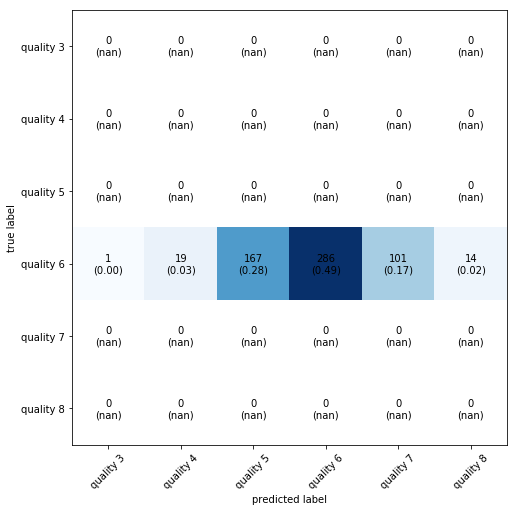


Precision of quality 3 is 0.00% 
Precision of quality 4 is 0.00% 
Precision of quality 5 is 0.00% 
Precision of quality 6 is 100.00% 
Precision of quality 7 is 0.00% 
Precision of quality 8 is 0.00% 

recall of quality 3 is 0.00% 
recall of quality 4 is 0.00% 
recall of quality 5 is 0.00% 
recall of quality 6 is 48.64% 
recall of quality 7 is 0.00% 
recall of quality 8 is 0.00% 

  F1 of quality 3: nan
  F1 of quality 4: nan
  F1 of quality 5: nan
  F1 of quality 6: 0.65
  F1 of quality 7: nan
  F1 of quality 8: nan


C:\Users\Neil\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in double_scalars


In [52]:
model_knn = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski')
model_knn.fit(X_resampled,Y_resampled)
Y_pred = model_knn.predict(X_test)
cm = confusion_matrix(Y_pred,Y_test)
print("Accuracy of KNN is {:.2f}%".format((np.trace(cm) /np.sum(cm))*100))

labels = ['quality 3','quality 4','quality 5','quality 6','quality 7','quality 8']
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm,
                                figsize =(8,8),
                                colorbar=False,
                                show_absolute=True,
                                show_normed=True,
                                class_names=labels)
plt.show()

precision = []
recall = []
print("")
for i in range(6):# selecting column i
    if np.sum(cm[:,i])==0:
        precision.append(0)
    else:
        precision.append(cm[i,i]/np.sum(cm[:,i]))
j = 3        
for i  in precision:
    print("Precision of quality {} is {:.2f}% ". format(j, i*100))
    j=j+1
print("")
for i in range(6):# selecting column i
    if np.sum(cm[i,:])==0:
        recall.append(0)
    else:
        recall.append(cm[i,i]/np.sum(cm[i,:]))
j = 3        
for i  in recall:
    print("recall of quality {} is {:.2f}% ". format(j, i*100))
    j=j+1
print("")
for i in range(6):
    print("  F1 of quality {}: {:.2f}".format(i+3,2*(precision[i]*recall[i]/(precision[i]+recall[i]))))

# Linear SVM on reduced dataset

Accuracy of  linear SVM on test data = 13.95%


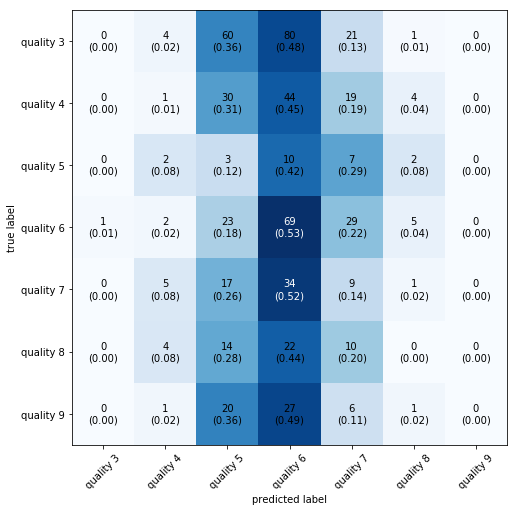


Precision of quality 3 is 0.00% 
Precision of quality 4 is 5.26% 
Precision of quality 5 is 1.80% 
Precision of quality 6 is 24.13% 
Precision of quality 7 is 8.91% 
Precision of quality 8 is 0.00% 
Precision of quality 9 is 0.00% 

recall of quality 3 is 0.00% 
recall of quality 4 is 1.02% 
recall of quality 5 is 12.50% 
recall of quality 6 is 53.49% 
recall of quality 7 is 13.64% 
recall of quality 8 is 0.00% 
recall of quality 9 is 0.00% 

  F1 of quality 3: nan
  F1 of quality 4: 0.02
  F1 of quality 5: 0.03
  F1 of quality 6: 0.33
  F1 of quality 7: 0.11
  F1 of quality 8: nan
  F1 of quality 9: nan


C:\Users\Neil\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in double_scalars


In [53]:
model_lsvm = SVC(kernel= 'linear')
model_lsvm.fit(X=X_std_resampled, y=Y_resampled)
y_pred_linear_test =  model_lsvm.predict(X_test)
cm = confusion_matrix(y_pred_linear_test,Y_test)
accuracy_svm_l= np.trace(cm)/np.sum(cm)
print("Accuracy of  linear SVM on test data = {:.2f}%".format(accuracy_svm_l*100))

labels = ['quality 3','quality 4','quality 5','quality 6','quality 7','quality 8','quality 9']
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm,
                                figsize =(8,8),
                                colorbar=False,
                                show_absolute=True,
                                show_normed=True,
                                class_names=labels)
plt.show()

precision = []
recall = []
print("")
for i in range(7):# selecting column i
    if np.sum(cm[:,i])==0:
        precision.append(0)
    else:
        precision.append(cm[i,i]/np.sum(cm[:,i]))
j = 3        
for i  in precision:
    print("Precision of quality {} is {:.2f}% ". format(j, i*100))
    j=j+1
print("")
for i in range(7):# selecting column i
    if np.sum(cm[i,:])==0:
        recall.append(0)
    else:
        recall.append(cm[i,i]/np.sum(cm[i,:]))
j = 3        
for i  in recall:
    print("recall of quality {} is {:.2f}% ". format(j, i*100))
    j=j+1
print("")
for i in range(7):
    print("  F1 of quality {}: {:.2f}".format(i+3,2*(precision[i]*recall[i]/(precision[i]+recall[i]))))

# Polynomial SVM on resampled data

Accuracy of  plynomial SVM on test data = 25.68%


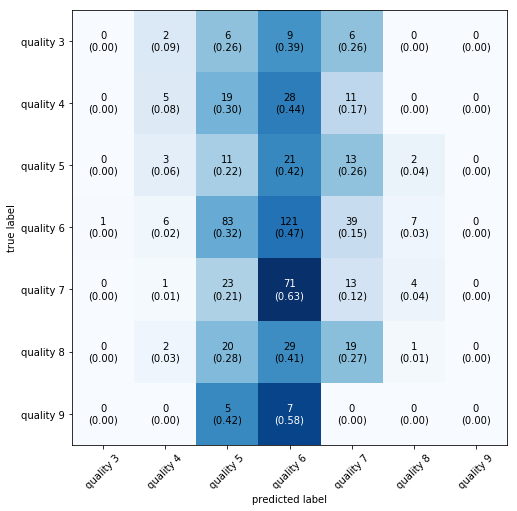


Precision of quality 3 is 0.00% 
Precision of quality 4 is 26.32% 
Precision of quality 5 is 6.59% 
Precision of quality 6 is 42.31% 
Precision of quality 7 is 12.87% 
Precision of quality 8 is 7.14% 
Precision of quality 9 is 0.00% 

recall of quality 3 is 0.00% 
recall of quality 4 is 7.94% 
recall of quality 5 is 22.00% 
recall of quality 6 is 47.08% 
recall of quality 7 is 11.61% 
recall of quality 8 is 1.41% 
recall of quality 9 is 0.00% 

  F1 of quality 3: nan
  F1 of quality 4: 0.12
  F1 of quality 5: 0.10
  F1 of quality 6: 0.45
  F1 of quality 7: 0.12
  F1 of quality 8: 0.02
  F1 of quality 9: nan


C:\Users\Neil\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


In [54]:
model_psvm = SVC(kernel= 'poly', degree = 3) 
model_psvm.fit(X=X_std_resampled, y=Y_resampled)
y_pred_poly_test = model_psvm.predict(X_test)
cm = confusion_matrix(y_pred_poly_test,Y_test)
accuracy_svm_p = np.trace(cm)/np.sum(cm)
accuracy_list[3].append(accuracy_svm_p)

print("Accuracy of  plynomial SVM on test data = {:.2f}%".format(accuracy_svm_p*100))

labels = ['quality 3','quality 4','quality 5','quality 6','quality 7','quality 8','quality 9']
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm,
                                figsize =(8,8),
                                colorbar=False,
                                show_absolute=True,
                                show_normed=True,
                                class_names=labels)
plt.show()

precision = []
recall = []
print("")
for i in range(7):# selecting column i
    if np.sum(cm[:,i])==0:
        precision.append(0)
    else:
        precision.append(cm[i,i]/np.sum(cm[:,i]))
j = 3        
for i  in precision:
    print("Precision of quality {} is {:.2f}% ". format(j, i*100))
    j=j+1
print("")
for i in range(7):# selecting column i
    if np.sum(cm[i,:])==0:
        recall.append(0)
    else:
        recall.append(cm[i,i]/np.sum(cm[i,:]))
j = 3        
for i  in recall:
    print("recall of quality {} is {:.2f}% ". format(j, i*100))
    j=j+1
print("")
for i in range(7):
    print("  F1 of quality {}: {:.2f}".format(i+3,2*(precision[i]*recall[i]/(precision[i]+recall[i]))))

# Decision tree Classifier on resmpled data

Accuracy of  Decision Tree Classifier on test data = 29.08%


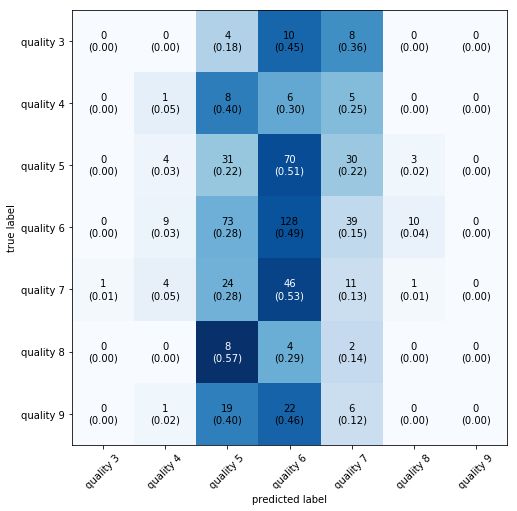


Precision of quality 3 is 0.00% 
Precision of quality 4 is 5.26% 
Precision of quality 5 is 18.56% 
Precision of quality 6 is 44.76% 
Precision of quality 7 is 10.89% 
Precision of quality 8 is 0.00% 
Precision of quality 9 is 0.00% 

recall of quality 3 is 0.00% 
recall of quality 4 is 5.00% 
recall of quality 5 is 22.46% 
recall of quality 6 is 49.42% 
recall of quality 7 is 12.64% 
recall of quality 8 is 0.00% 
recall of quality 9 is 0.00% 

  F1 of quality 3: nan
  F1 of quality 4: 0.05
  F1 of quality 5: 0.20
  F1 of quality 6: 0.47
  F1 of quality 7: 0.12
  F1 of quality 8: nan
  F1 of quality 9: nan


C:\Users\Neil\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in double_scalars


In [55]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_std_resampled,Y_resampled)
Y_pred = model_dt.predict(X_test)
cm = confusion_matrix(Y_pred,Y_test)
accuracy_dt = np.trace(cm)/np.sum(cm)
print("Accuracy of  Decision Tree Classifier on test data = {:.2f}%".format(accuracy_dt *100))

labels = ['quality 3','quality 4','quality 5','quality 6','quality 7','quality 8','quality 9']
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm,
                                figsize =(8,8),
                                colorbar=False,
                                show_absolute=True,
                                show_normed=True,
                                class_names=labels)
plt.show()

precision = []
recall = []
print("")
for i in range(7):# selecting column i
    if np.sum(cm[:,i])==0:
        precision.append(0)
    else:
        precision.append(cm[i,i]/np.sum(cm[:,i]))
j = 3        
for i  in precision:
    print("Precision of quality {} is {:.2f}% ". format(j, i*100))
    j=j+1
print("")
for i in range(7):# selecting column i
    if np.sum(cm[i,:])==0:
        recall.append(0)
    else:
        recall.append(cm[i,i]/np.sum(cm[i,:]))
j = 3        
for i  in recall:
    print("recall of quality {} is {:.2f}% ". format(j, i*100))
    j=j+1
print("")
for i in range(7):
    print("  F1 of quality {}: {:.2f}".format(i+3,2*(precision[i]*recall[i]/(precision[i]+recall[i]))))

# Synthetic Minority Oversampling Technique

In [56]:
from imblearn.over_sampling import SMOTE, ADASYN

In [57]:
count = np.zeros(11)
j =0
for i in quality:
        count[i] = count[i] + 1
for i  in count[1:]:
    print("Number of samples of class {} = {:.1f}".format(j+1,i))
    #print("percentge of samples of class {} = {:.3f}%".format(j+1,(i/quality.shape[0])*100))
    j = j+1   

Number of samples of class 1 = 0.0
Number of samples of class 2 = 0.0
Number of samples of class 3 = 17.0
Number of samples of class 4 = 134.0
Number of samples of class 5 = 1163.0
Number of samples of class 6 = 1752.0
Number of samples of class 7 = 707.0
Number of samples of class 8 = 140.0
Number of samples of class 9 = 5.0
Number of samples of class 10 = 0.0


### The number of samples belonging to class 9 has to be atleast 6 for SMOTE to be appicablel on this data set. As  it is minority class in danger and n_samples = 5. 
### n_samples >= n_neighbors expected

# We duplicate all samples of class 5  

In [64]:
df5 = wine_data[wine_data['quality']==9]
data_new= pd.concat([df5,wine_data], axis=0)
data_new.shape

(3923, 13)

In [65]:
X = data_new.iloc[:,0:11]
Y = data_new.iloc[:,11]
print("The feature matrix is of order {} and the class level matrix is order {}.".format (X.shape, Y.shape))


The feature matrix is of order (3923, 11) and the class level matrix is order (3923,).


In [69]:
X_resampled_smote, Y_resampled_smote = SMOTE().fit_resample(X, Y)

In [70]:
X_resampled_smote.shape

(12264, 11)

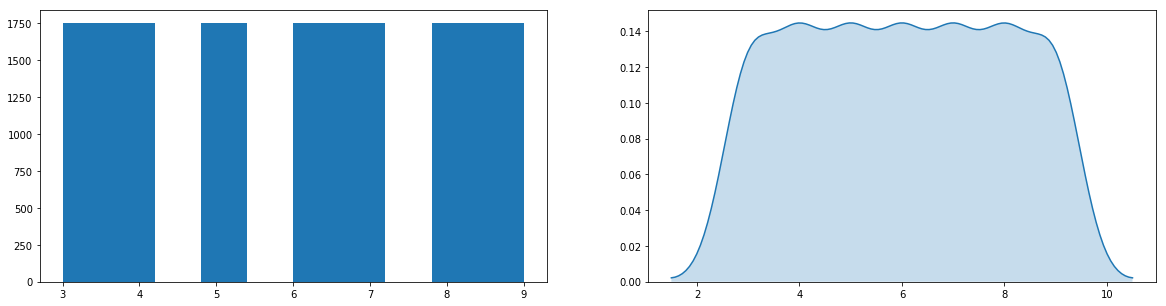

In [72]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.hist(Y_resampled)
plt.subplot(1,2,2)
sb.kdeplot(np.array(Y_resampled), bw=0.5,shade = True)

# Logistic Regression

C:\Users\Neil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Neil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy of Logistic Regression on test data = 18.37%


C:\Users\Neil\Anaconda3\lib\site-packages\mlxtend\plotting\plot_confusion_matrix.py:66: RuntimeWarning: invalid value encountered in true_divide
  normed_conf_mat = conf_mat.astype('float') / total_samples


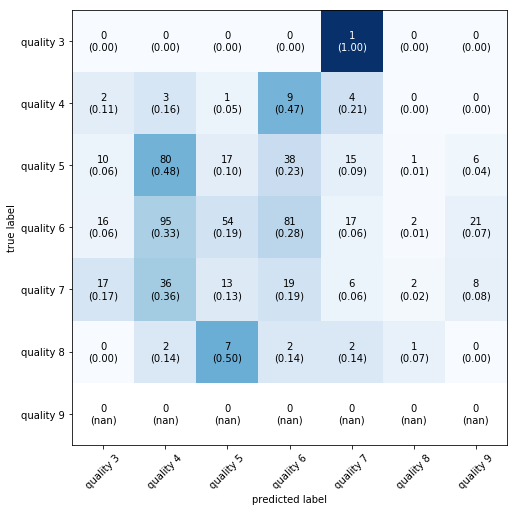


Precision of quality 3 is 0.00% 
Precision of quality 4 is 1.39% 
Precision of quality 5 is 18.48% 
Precision of quality 6 is 54.36% 
Precision of quality 7 is 13.33% 
Precision of quality 8 is 16.67% 
Precision of quality 9 is 0.00% 

recall of quality 3 is 0.00% 
recall of quality 4 is 15.79% 
recall of quality 5 is 10.18% 
recall of quality 6 is 28.32% 
recall of quality 7 is 5.94% 
recall of quality 8 is 7.14% 
recall of quality 9 is 0.00% 

  F1 of quality 3: nan
  F1 of quality 4: 0.03
  F1 of quality 5: 0.13
  F1 of quality 6: 0.37
  F1 of quality 7: 0.08
  F1 of quality 8: 0.10
  F1 of quality 9: nan


C:\Users\Neil\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in double_scalars


In [79]:
model_lr = LogisticRegression()
model_lr.fit(X_resampled_smote,Y_resampled_smote)
Y_pred = model_lr.predict(X_test)
cm = confusion_matrix(Y_test,Y_pred)
accuracy_lr= np.trace(cm)/np.sum(cm)
print("Accuracy of Logistic Regression on test data = {:.2f}%".format(accuracy_lr *100))

labels = ['quality 3','quality 4','quality 5','quality 6','quality 7','quality 8','quality 9']
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm,
                                figsize =(8,8),
                                colorbar=False,
                                show_absolute=True,
                                show_normed=True,
                                class_names=labels)
plt.show()

precision = []
recall = []
print("")
for i in range(7):# selecting column i
    if np.sum(cm[:,i])==0:
        precision.append(0)
    else:
        precision.append(cm[i,i]/np.sum(cm[:,i]))
j = 3        
for i  in precision:
    print("Precision of quality {} is {:.2f}% ". format(j, i*100))
    j=j+1
print("")
for i in range(7):# selecting column i
    if np.sum(cm[i,:])==0:
        recall.append(0)
    else:
        recall.append(cm[i,i]/np.sum(cm[i,:]))
j = 3        
for i  in recall:
    print("recall of quality {} is {:.2f}% ". format(j, i*100))
    j=j+1
print("")
for i in range(7):
    print("  F1 of quality {}: {:.2f}".format(i+3,2*(precision[i]*recall[i]/(precision[i]+recall[i]))))

# KNN 

Accuracy of KNN is 28.57%


C:\Users\Neil\Anaconda3\lib\site-packages\mlxtend\plotting\plot_confusion_matrix.py:66: RuntimeWarning: invalid value encountered in true_divide
  normed_conf_mat = conf_mat.astype('float') / total_samples


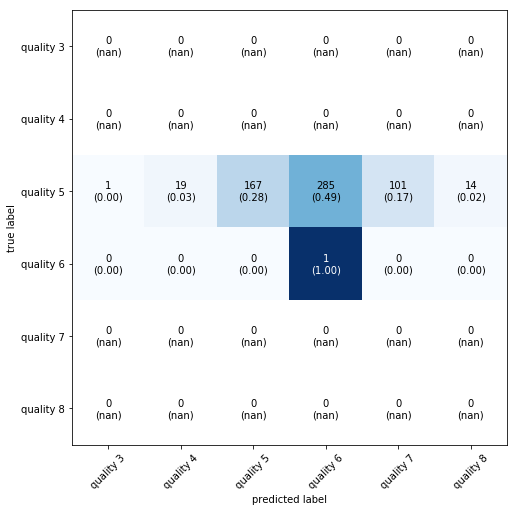


Precision of quality 3 is 0.00% 
Precision of quality 4 is 0.00% 
Precision of quality 5 is 100.00% 
Precision of quality 6 is 0.35% 
Precision of quality 7 is 0.00% 
Precision of quality 8 is 0.00% 

recall of quality 3 is 0.00% 
recall of quality 4 is 0.00% 
recall of quality 5 is 28.45% 
recall of quality 6 is 100.00% 
recall of quality 7 is 0.00% 
recall of quality 8 is 0.00% 

  F1 of quality 3: nan
  F1 of quality 4: nan
  F1 of quality 5: 0.44
  F1 of quality 6: 0.01
  F1 of quality 7: nan
  F1 of quality 8: nan


C:\Users\Neil\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in double_scalars


In [80]:
model_knn = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski')
model_knn.fit(X_resampled_smote,Y_resampled_smote)
Y_pred = model_knn.predict(X_test)
cm = confusion_matrix(Y_pred,Y_test)
print("Accuracy of KNN is {:.2f}%".format((np.trace(cm) /np.sum(cm))*100))

labels = ['quality 3','quality 4','quality 5','quality 6','quality 7','quality 8']
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm,
                                figsize =(8,8),
                                colorbar=False,
                                show_absolute=True,
                                show_normed=True,
                                class_names=labels)
plt.show()

precision = []
recall = []
print("")
for i in range(6):# selecting column i
    if np.sum(cm[:,i])==0:
        precision.append(0)
    else:
        precision.append(cm[i,i]/np.sum(cm[:,i]))
j = 3        
for i  in precision:
    print("Precision of quality {} is {:.2f}% ". format(j, i*100))
    j=j+1
print("")
for i in range(6):# selecting column i
    if np.sum(cm[i,:])==0:
        recall.append(0)
    else:
        recall.append(cm[i,i]/np.sum(cm[i,:]))
j = 3        
for i  in recall:
    print("recall of quality {} is {:.2f}% ". format(j, i*100))
    j=j+1
print("")
for i in range(6):
    print("  F1 of quality {}: {:.2f}".format(i+3,2*(precision[i]*recall[i]/(precision[i]+recall[i]))))

# Decision Tree

Accuracy of  Decision Tree Classifier on test data = 22.11%


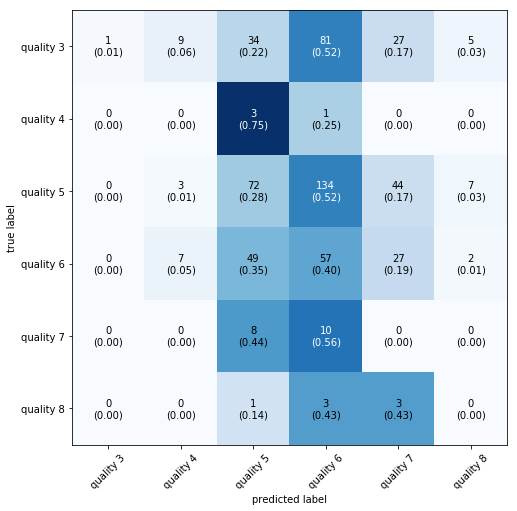


Precision of quality 3 is 100.00% 
Precision of quality 4 is 0.00% 
Precision of quality 5 is 43.11% 
Precision of quality 6 is 19.93% 
Precision of quality 7 is 0.00% 
Precision of quality 8 is 0.00% 

recall of quality 3 is 0.64% 
recall of quality 4 is 0.00% 
recall of quality 5 is 27.69% 
recall of quality 6 is 40.14% 
recall of quality 7 is 0.00% 
recall of quality 8 is 0.00% 

  F1 of quality 3: 0.01
  F1 of quality 4: nan
  F1 of quality 5: 0.34
  F1 of quality 6: 0.27
  F1 of quality 7: nan
  F1 of quality 8: nan


C:\Users\Neil\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in double_scalars


In [82]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_resampled_smote,Y_resampled_smote)
Y_pred = model_dt.predict(X_test)
cm = confusion_matrix(Y_pred,Y_test)
accuracy_dt = np.trace(cm)/np.sum(cm)
print("Accuracy of  Decision Tree Classifier on test data = {:.2f}%".format(accuracy_dt *100))

labels = ['quality 3','quality 4','quality 5','quality 6','quality 7','quality 8']
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm,
                                figsize =(8,8),
                                colorbar=False,
                                show_absolute=True,
                                show_normed=True,
                                class_names=labels)
plt.show()

precision = []
recall = []
print("")
for i in range(6):# selecting column i
    if np.sum(cm[:,i])==0:
        precision.append(0)
    else:
        precision.append(cm[i,i]/np.sum(cm[:,i]))
j = 3        
for i  in precision:
    print("Precision of quality {} is {:.2f}% ". format(j, i*100))
    j=j+1
print("")
for i in range(6):# selecting column i
    if np.sum(cm[i,:])==0:
        recall.append(0)
    else:
        recall.append(cm[i,i]/np.sum(cm[i,:]))
j = 3        
for i  in recall:
    print("recall of quality {} is {:.2f}% ". format(j, i*100))
    j=j+1
print("")
for i in range(6):
    print("  F1 of quality {}: {:.2f}".format(i+3,2*(precision[i]*recall[i]/(precision[i]+recall[i]))))

# Under sampling and over sampling do not help in this case because we the minority classes have negligible no of samples. 
# Under sampling reduces the data set to such an extent that prediction becomes almost impossible
# Over sampling, either by smote or duplication, introduces samples that are not real and then the models fail again.